### Exploratory Data Analysis

#### 1.1 Data Understanding

At a first we will start by understanding the target dataset in question prior to implementing data cleansing and data pre-processing steps. Undestanding the data is integral to identifying the data cleansing and preprocessing steps accordingly to have a full grasp on what the data contains and or lacks. In addition to statistical insights and identifying the distribution, the purpose of this subsection is to also identify missing values, duplicates, unmatched datatypes, and relevant outliers.

To kick-start the exploratory data analysis, we need to employ two important libraries, namely, pandas, NumPy, matplotlib and seaborn which represent an essential tool in the exploratory data analysis process as they provide a wide range of functions and features to preform mathematical operations, uploading datasets, cleansing and preprocessing and important visualization tools. Hence, we import the two libraries and run the metro dataset as follows:

In [563]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [564]:
bike_dataset = pd.read_csv("metro.csv") 
bike_dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


It is worth noting that the error above is a warning message that is generated when we use the read_csv function in pandas to read a CSV file that has columns with varied data types. It implies that some of the values in the specified column (column 10 in this case) are of a different data type than other attributes, and pandas is unable to determine the correct data type for the column. To understand the data, we may attempt a check for inconsistencies in the data stemming from Column 10 "bike_id" as follows: 

In [565]:
#Accessing Column 10, using the iloc function
print(bike_dataset.iloc[:, 10])


#Preforming a test that identifies mixed datatype in the bike_id column

for cols in bike_dataset.columns:
    if 'mixed' in pd.api.types.infer_dtype(bike_dataset[cols]):
        print(cols)
        print(pd.api.types.infer_dtype(bike_dataset[cols]), '\n')

#Identifying inconsistencies in Column 10

inconsistent_value = bike_dataset.loc[~bike_dataset['bike_id'].astype(str).str.isdigit(), 'bike_id'].tolist()
inconsistent_value

0         6168
1        17584
2        18920
3         6016
4         5867
         ...  
92119    19655
92120    18984
92121    12361
92122    16580
92123    15727
Name: bike_id, Length: 92124, dtype: object
bike_id
mixed-integer 



['Rblock', 'Rblock']

The above output prints a list of inconsistent values found in column 10. It shows that there exist two inconsistent values that do not correspond to the values of the bike_id that are labelled "Rblock". As a result, our test also shows that only the "bike_id" column contains mixed datatypes. In order to preform the EDA, we need to remove inconsistencies in the dataset alongwith other blank or missing values. 

Merely outputting the dataset will not provide much insight as "pandas.DataFrame.head()" function will only showcase the first 5 rows of the dataframe by default. We can only observe that our dataset contains 15 attributes, including the trip_id. To access the number rows and columns as well as the datatype of the dataset, we can simply use the "pandas.DataFrame.shape" attribute and "type()" function as follows:

In [566]:
#Checking the size of the data
num_rows, num_columns = bike_dataset.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

#Checking for the datatype of the metro dataset

type(bike_dataset)

Number of rows: 92124
Number of columns: 15


pandas.core.frame.DataFrame

As of the above output, we understand that the size of the data includes 92124 records / rows and 15 attributes / columns. The datatype of the dataset is a pandas Dataframe. As outputted, by the pandas.DataFrame.shape attribute, the datasize consists of 92124 rows/instances, each row representing a bike trip across 15 attributes/columns representing granularity of information per each bike trip. It is apparent that the dataset does not entail a class label providing that the purpose of the analysis is not to solve a classification / prediction problem, but rather to conduct exploratory data analysis and derive insights on the "metro.csv" dataset. 

We can however, extract the datatype of each column in the dataset in a summary by simply using using "pandas.DataFrame.dtypes" attribute or "pandas.DataFrame.info()" function as follows: 

In [567]:
# 1 Check the data types of the columns using d.types attribute

print(bike_dataset.dtypes)

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                 object
plan_duration            int64
trip_route_category     object
passholder_type         object
bike_type               object
dtype: object


In [568]:
# 2 Check the data types using the info function

bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              92124 non-null  int64  
 1   duration             92124 non-null  int64  
 2   start_time           92124 non-null  object 
 3   end_time             92124 non-null  object 
 4   start_station        92124 non-null  int64  
 5   start_lat            89985 non-null  float64
 6   start_lon            89985 non-null  float64
 7   end_station          92124 non-null  int64  
 8   end_lat              88052 non-null  float64
 9   end_lon              88052 non-null  float64
 10  bike_id              92124 non-null  object 
 11  plan_duration        92124 non-null  int64  
 12  trip_route_category  92124 non-null  object 
 13  passholder_type      92124 non-null  object 
 14  bike_type            92124 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

We can recognize that some datatypes are not appropriately assigned when uploading the dataset. For instance, looking at the tabular output of the dataset, we observe that the "bike_id" column has an object data type which should be converted to a numerical datatype, mainly integer. Also, "start_time" and "end_time" columns are assigned as object datatypes. This implies that each column assinged as an object may contain values text, numeric values, or dates that are represented as strings.

During the preprocessing phase, we should consider assigning the appropriate datatype to each column to facilitate our exploratory data analysis onwards.

It's worth stressing that "pandas.DataFrame.dtypes" attribute would only display the datatype corresponding to each column, whereas the "pandas.DataFrame.info()" helps provide additional description of the dataset apart from the datatype of attributes, notably, the non-null count, data size, index number of attributes and memory storage. We can establish that not all columns account for the entire 92124 instances in the dataset. Columns "start_lat" "start_lon" encompass 89985 rows each while "end_lat" and "end_lon" have 88052 rows per each. 

This shortfall could stem from missing values in the columns with less records than the datasize. In order to identify these missing values, we can run the "pandas.DataFrame.insnull()" and the "sum()"function to count the missing values if any in our dataset's attributes as follows: 

In [569]:
# Identify missing values
missing = bike_dataset.isnull()

# Count the number of missing values in each column
missing_count = missing.sum()

# Display the missing values and their count
print(missing_count)

# Calculate the percentage of rows with missing values in the dataset
percentage = bike_dataset.isnull().any(axis=1).mean().round(4) * 100

# Print the percentage of rows with missing values
print(percentage)

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64
5.82


As demonstrated in the output, this confirms that the columns with less instances would represent missing values in the dataset. These missing values represent 5.82% of the entire data records. Given the immateriality of these records in comparison with the datasize, it should not impact our analysis in case we wish to drop the rows corresponding to these values in the dataset. Hence, in the data preprocessing step, we will preform missing values removal.

We may also check for any potential duplicates in the dataset unsing the "duplicate()" function as follows:

In [570]:
#Checking for duplicates in the dataset

duplicates = bike_dataset[bike_dataset.duplicated()]

#Count for duplicates in the dataset

num_duplicates = duplicates.count()

print(num_duplicates)

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64


As of the output, we understand that our dataset has no duplicate rows and hence, no duplicate removal will be preformed in the data cleansing phase of the EDA. 

As a next step, we may also demonstrate the statistical charecteristics of the metro dataset and comment on the distribution of the attributes to have a clear crasp on the properties of the dataset. To do so, we employ the "pandas.DataFrame.describe()" function:

In [573]:
# Calculate descriptive statistics for the dataset
descriptive_stats = bike_dataset.describe().style

# Set title for the table
descriptive_stats.set_caption("Table 01: Descriptive Statistics for the Metro Dataset")

# Display the table
display(descriptive_stats)

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,92124.000000,92124.000000,92124.000000,89985.000000,89985.000000,92124.000000,88052.000000,88052.000000,92124.000000
mean,127428624.993096,33.168588,3484.899690,34.034786,-118.287893,3480.271026,34.034895,-118.286699,60.290977
std,1524133.658944,129.057841,611.483883,0.058803,0.073501,609.942741,0.058790,0.072628,111.141364
min,124657107.000000,1.000000,3000.000000,33.710979,-118.495422,3000.000000,33.710979,-118.495422,1.000000
25%,126137540.500000,6.000000,3029.000000,34.035801,-118.281181,3028.000000,34.037048,-118.280952,1.000000
50%,127491114.500000,12.000000,3062.000000,34.046810,-118.258537,3062.000000,34.046810,-118.258537,30.000000
75%,128737946.250000,22.000000,4285.000000,34.051941,-118.248253,4285.000000,34.051941,-118.248253,30.000000
max,130387712.000000,1440.000000,4453.000000,34.177662,-118.231277,4453.000000,34.177662,-118.231277,999.000000


As per the descriptive statistics output through the ".describe()" function, we can make the following observations about the distribution of the data in the dataset:

The column "trip_id" represents unique values per each journey, and hence the distribution of the trip_id will not provide valuable information to our analysis.

The column "duration" represents values in minutes of each trip, which is essential to our analysis. It has a mean of 33.17 and a median of 12, which indicates that the values in this column are skewed towards the left. The minimum and maximum values of this column are 1 and 1440, respectively, which suggests that there are extreme values in this column, providing that the maximum duration is 1440 minutes, equivalent to 24 hours of cycling which could be an outlier. However, there exist other long durations up to 23 hours. Further investigations need to be carried out to understand the root-cause of these unusually longer bike durations. The standard deviation of this column is 129.06, which indicates that the values in this column are relatively dispersed given the variation of cycling durations.

According to the mean and median of "start_lat" they indicate a distribution skewed towards lower values, or left skewness. On the other hand "start_station", "start_lon", and "end_station" seem to be skewed towards higher values, or right skewness

Also the distribution of the "end_lat" and "end_lon" columns is roughly symmetrical, with a mean value close to the median value and relatively small standard deviation. The distribution of the "plan_duration" column, on the other hand, appears to be skewed to the right, with a significantly larger standard deviation compared to the "end_lat" and "end_lon" attributes. This indicates that there may be a larger number of observations with higher values for "plan_duration" compared to the lower values. It is also worth noting that the minimum value for "plan_duration" is 1, while the maximum value is 999 and has a mean of 60.29 and a median of 30 which can be construed that it contains a wide range of values for this column and that the distribution is skewed towards the lower end of the range.

To infer, the distribution of the data in the dataset appears to be skewed or non-normal, with some columns having a relatively narrow range of values and others having a wide range of values. There may also be some outliers or anomalies in the data, particularly in the columns "duration" and "plan_duration". However, some outliers represent factual data values and therefore, further investigations need to be preformed. Further analysis and visualization of the data through histograms or box plots, may provide more insights into the distribution and patterns of the data. As the histogram method will not preform when the data is of a categorical nature, we will display the histogram after assigning the correct datatypes to the attributes of the dataset in the data cleansing phase.

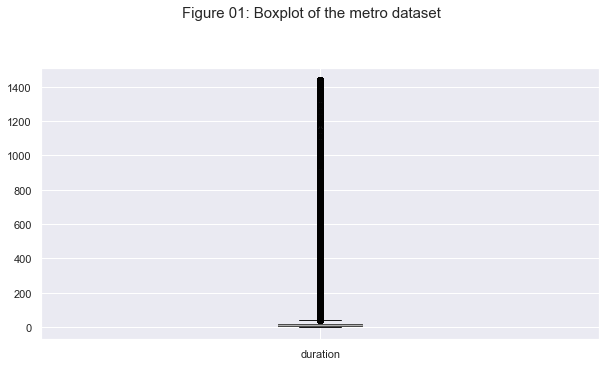

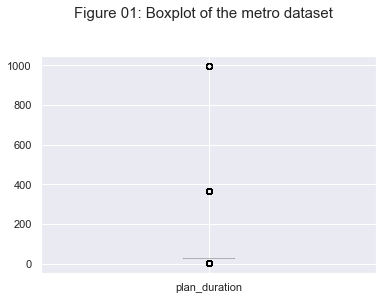

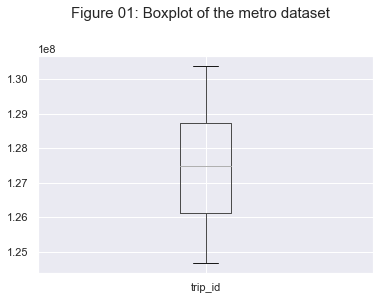

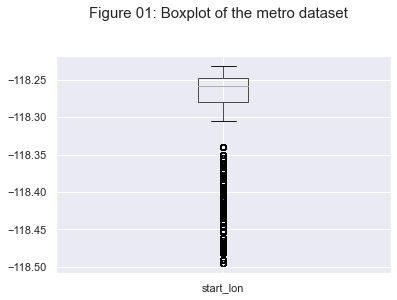

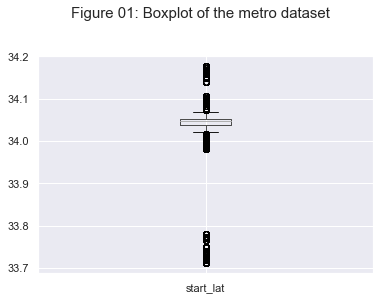

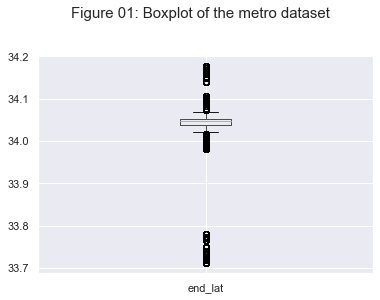

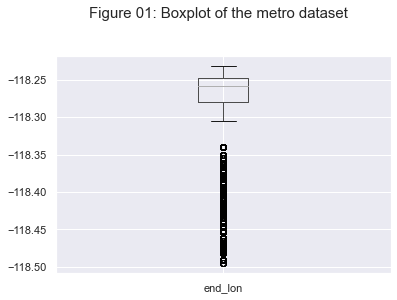

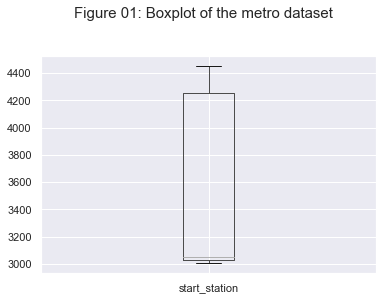

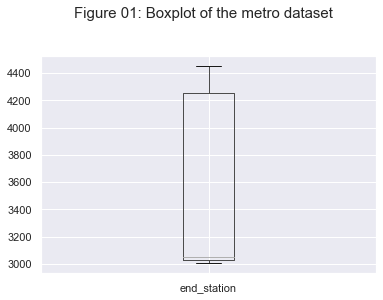

In [602]:
#Checking for outliers in for duration and plan_duration

hc = bike_dataset[['duration', 'plan_duration', 'trip_id', 'start_lon', 'start_lat', 'end_lat', 'end_lon', 'start_station', 'end_station']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

for i in hc.columns:
    hc.boxplot(column=i)
    plt.suptitle('Figure 01: Boxplot of the metro dataset', fontsize=15, y=1.05)
    plt.show();

Analyzing the output of the boxplots above, we may observe that the datapoints in most of the selected columns for the boxplot, apart from the 'start_station' and 'end_station' columns, range 1.5 below or above the interquartile range which usually how outliers are identified from a statistical perspective. However, since a substantial number of data points lie below or above the interquartile range, we cannot construe these values as outliers given they should be exceptional values in the dataset that could stem from anomalies and errors. 

in this case we should look at the nature of the data, for example, the end longitude , end latitude as well as the start longitude and start latitude represent coordinates. In that sense, it is possible that the data is skewed or has a long tail, which may cause the data points outside the interquartile range to appear as outliers in the boxplot. However, these data points are not  outliers providing that they are within the expected range of values for the end longitude and end latitude variables. This is also true for the rest of the selected columns in boxplot, namely, 'duration' and 'plan_duration'. While practically, we do not usually encounter a large number of extended bike duration (e.g., 24 hours) this could arise from the day pass plan as the data would reflect the usage of the service as opposed to the actual usage of the bike. 

As for the rest of the columns namely 'trip_route_category', 'passholder_type', 'bike_type' boxplot cannot print the data as they represent an object datatype. As we know that they are categorical data, we should be able to deduce that no outliers are in these attributes. We may aslo check for the value count as follows: 

In [587]:
print(bike_dataset[['bike_type', 'passholder_type', 'trip_route_category']].value_counts())

bike_type  passholder_type  trip_route_category
electric   Monthly Pass     One Way                31211
standard   Monthly Pass     One Way                15907
           Walk-up          One Way                 6622
electric   Walk-up          One Way                 4897
smart      Walk-up          One Way                 4834
electric   Monthly Pass     Round Trip              4345
smart      Monthly Pass     One Way                 3884
electric   Annual Pass      One Way                 3273
smart      Walk-up          Round Trip              3222
standard   Walk-up          Round Trip              2450
           Annual Pass      One Way                 2366
smart      One Day Pass     One Way                 2049
electric   Walk-up          Round Trip              1477
smart      One Day Pass     Round Trip              1116
standard   Monthly Pass     Round Trip              1056
electric   One Day Pass     One Way                  792
smart      Monthly Pass     Round Trip  

As of the above count, we can determine that the categorical columns also do not show inconsistent or extreme values as they make up  a limited set of categories in terms of bike type, passholder type and trip route category.

#### 1.2 Data cleansing 

Taking into account the insights derived and identified inconsistencies, we will preform data cleansing in order to prepare the data for analysis and visualization. In this subsection, we will address the missing values, identified inconsistencies, as well as converting column datatypes to fit the analysis as follows: 

In [588]:
#Drop missing values
bike_dataset.dropna(inplace=True)
# Display the number of rows and columns after dropping the missing values
print(f'After dropping missing values: {bike_dataset.shape[0]} rows, {bike_dataset.shape[1]} columns')

After dropping missing values: 86760 rows, 15 columns


This as a result diminished the datasize from 92124 to 86760 which is accounted for 94.18% of the dataset. Dropped missing values should be immaterial and does not undermine the analysis going forward.

In [589]:
# Identify missing values
missing_check = bike_dataset.isnull()

# Count the number of missing values in each column
missing_count_clean = missing_check.sum()

# Display the missing values and their count
print(missing_count_clean)

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64


After dropping the missing values, we can preform a second check to confirm that the .dropna() function was stored correctly into the DataFrame. We also run a check for inconsistent values in Column 10 to verify whether "Rblock" in two Columns is still in the data as shown below.

In [590]:
inconsistent_value = bike_dataset.loc[~bike_dataset['bike_id'].astype(str).str.isdigit(), 'bike_id'].tolist()
inconsistent_value

[]

The list shows an empty value, which implies that the two rows with "Rblock" have been removed from the database. Hence, no further cleasing regarding removal of rows will be preformed after this stage. Next, we attempt to assign the appropriate datatypes to the columns to render it readable for analysis and visualization subsequently. As we demonstrated the datatypes in the data understanding section, we could notice that "bike_id", "start_time", and "end_time" all have an object datatype. 

Hence, we will convert "bike_id" to an integer datatype to reflect the numerical cateogry of the column. For "start_time" and "end_time" we will confirm both attributes to datetime to reflect best in our analysis and visualization as follows:

In [591]:
# Convert the start_time and end_time columns to datetime

bike_dataset['start_time'] = pd.to_datetime(bike_dataset['start_time'])
bike_dataset['end_time'] = pd.to_datetime(bike_dataset['end_time'])

#Convert the bike_id into an integer datatype 

bike_dataset['bike_id'] = pd.to_numeric(bike_dataset["bike_id"])

We can also verify again if the dataset is free of any mixed datatypes for each column by employing the following lines of code: 

In [592]:
for cols in bike_dataset.columns:
    print(cols)
    print(pd.api.types.infer_dtype(bike_dataset[cols]), '\n')

trip_id
integer 

duration
integer 

start_time
datetime64 

end_time
datetime64 

start_station
integer 

start_lat
floating 

start_lon
floating 

end_station
integer 

end_lat
floating 

end_lon
floating 

bike_id
integer 

plan_duration
integer 

trip_route_category
string 

passholder_type
string 

bike_type
string 



In [593]:
# Check the data types of the columns
print(bike_dataset.dtypes)

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
dtype: object


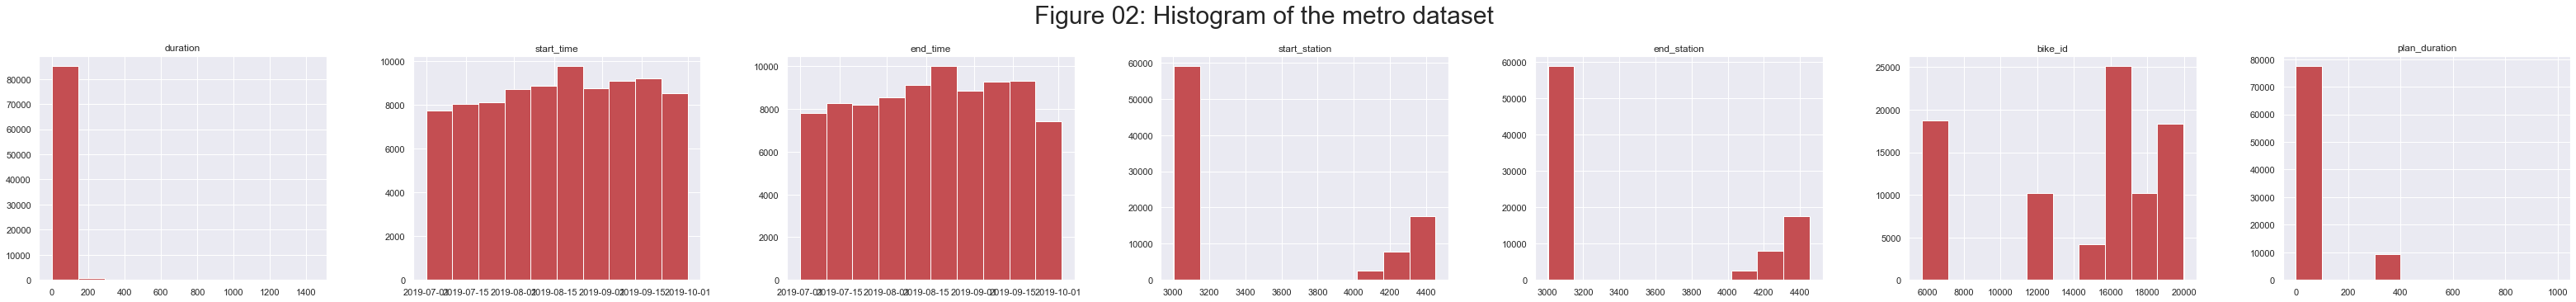

In [632]:
# Select only the 'station' and 'riders' columns
hd = bike_dataset[['duration', 'start_time', 'end_time', 'start_station', 'end_station', 'bike_id', 'plan_duration']]

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(55, 5))
hd.hist(ax=axes, bins=10, layout=(1, 2), color= 'r')
plt.suptitle('Figure 02: Histogram of the metro dataset', fontsize=30, y=1.05)
plt.show();

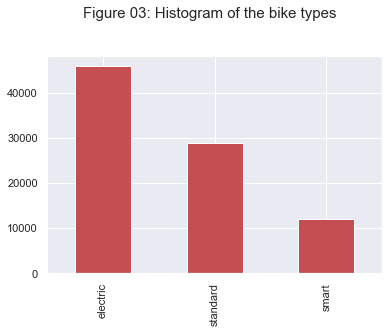

In [607]:
bike_dataset['bike_type'].value_counts().plot(kind='bar', color= 'r')
plt.suptitle('Figure 03: Histogram of the bike types', fontsize=15, y=1.05);

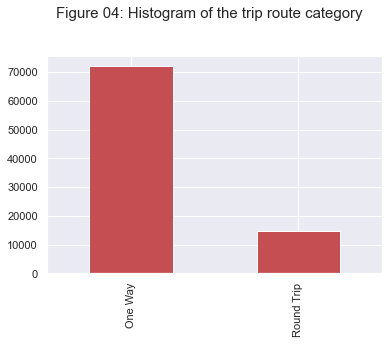

In [609]:
bike_dataset['trip_route_category'].value_counts().plot(kind='bar', color= 'r')
plt.suptitle('Figure 04: Histogram of the trip route category', fontsize=15, y=1.05);

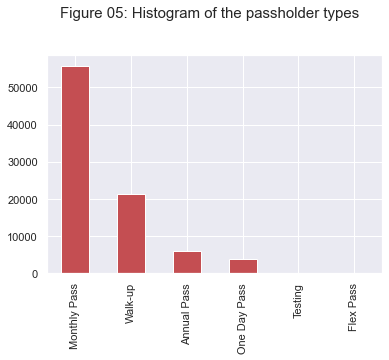

In [611]:
bike_dataset['passholder_type'].value_counts().plot(kind='bar', color= 'r')
plt.suptitle('Figure 05: Histogram of the passholder types', fontsize=15, y=1.05);

From the above histogram, we exclude geographical coordinate attributes and trip_id as they do not provide relevant information in trems of distribution. Our comments on the distribution is more visual using the above plots. We can reaffirm the skewness of distribution as explained in the data understanding subsection. From the categorical plots, we can also deduce based on the number of counts that the bike type with frequent use is the electric bike among other bike types. In terms of the trip category, it is also apparent that one way journies are the most selected in comparison to roudtrips. As for the passholder plan, we recognize that monthly passes are the most used offer.

These insights will enable stakholders to understand the customer behaviour and accordingly either invest more in adding electric bikes  or act upon addressing areas of improvement as to incentivize offers that less purchased by customers.

#### 1.3 Data transformation

In this section we will explore the necessary data transformation techniques. As we understand that the purpose of the EDA is to derive insights from the dataset as opposed to feeding the dataset to a model or a specific supervised / unsupervised algorithms, there should be not requirements to scale the data, reduce the dimensions, or oversample a class, providing this does not represent a classification problem nor do we have the ground truth to accuont for data balance issues. 

However, we might consider transforming the data such that it enables us to extract additional relevant insights about the use of the bike that serves best the business aspect of the analysis, for instance, the time of the day with frequent use of bikes, the day of the week in which bikes are mostly utilized, and go as far as to intersect the time of the day / day of the week with the start station and end station. 

Thus, to do this, we need to provide more granularity in terms of the datetime for "start_time" and "end_time" columns. We may add additional columns that indicate the hour of the day as well as the day of the week as follows: 

In [614]:
#Add month columns
month_calender = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6: 'June',
         7:'July', 8: 'Aug', 9:'Sep', 10: 'Oct', 11:'Nov', 12:'Dec'}
bike_dataset['month'] = bike_dataset['start_time'].dt.month.map(month_calender)

#Change to categorical data
bike_dataset['month'] = bike_dataset['month'].astype('category')

In [615]:
#Add weekday columns
week_day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bike_dataset['weekday'] = bike_dataset['start_time'].dt.weekday.map(week_day)

#Change to categorical data
bike_dataset['weekday'] = bike_dataset['weekday'].astype('category')

In [616]:
#Add hour columns 

bike_dataset['hour'] = bike_dataset['start_time'].dt.hour

##Change to categorical data

bike_dataset['hour'] = bike_dataset['hour'].astype('category')

After adding the necessary columns we can check again to view how this is outputted in our dataset: 

In [633]:
# Check the data types of the columns
print(bike_dataset.dtypes)

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
month                        category
weekday                      category
hour                         category
dtype: object


#### 1.4 Data analysis

In this subsection, we will be extracting insights and information from the data by preforming plots and investigating the extent to which patterns can be identified to understand better consumer behavior, the service properties and challenges and produce data-driven recommendations. At a first step, we would like to understand the count of the month, weekday and hour which can tell us at what hour of the day the service is used by riders in which day of the week, and month. To display this, we employ the "sns.countplot()" as follows:

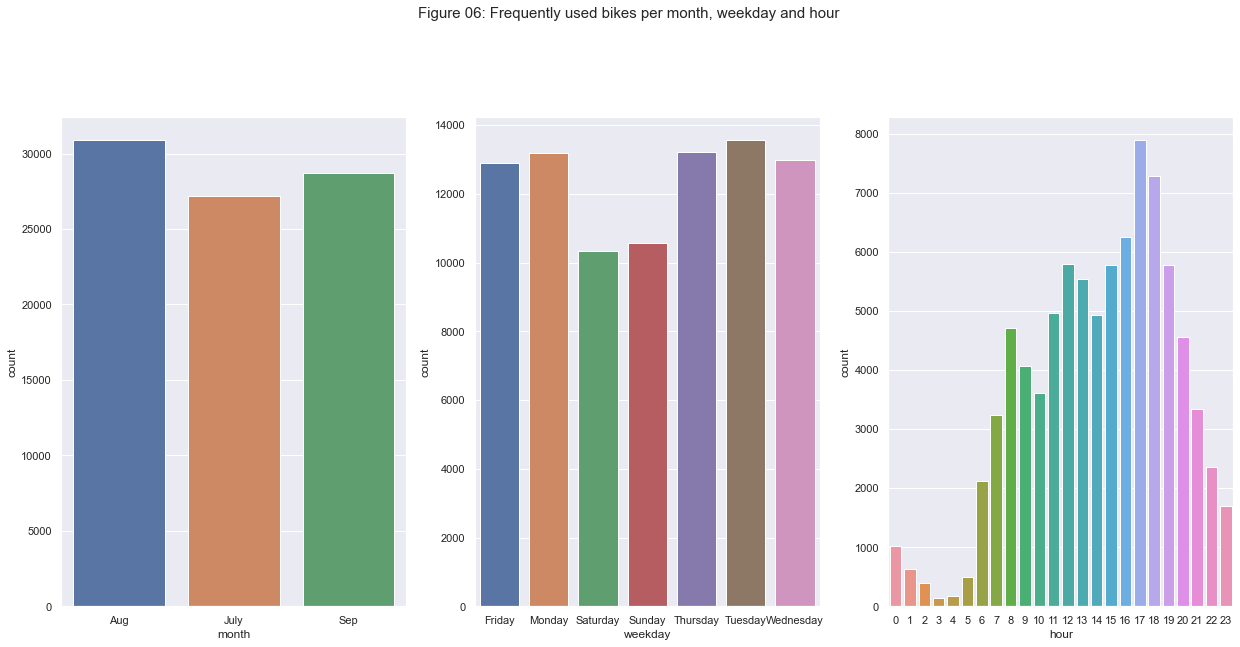

In [639]:
#Plotting month, day of the week and hour counts

plt.figure(figsize = [21,9])
plt.subplot(1, 3, 1)
sns.countplot(data= bike_dataset, x='month')
           
plt.subplot(1, 3, 2)
sns.countplot(data= bike_dataset, x='weekday')
           
plt.subplot(1, 3, 3)
sns.countplot(data= bike_dataset, x='hour')

plt.suptitle('Figure 06: Frequently used bikes per month, weekday and hour', fontsize=15, y=1.05);

Interpreting the above barcharts, we establish that the hour with frequent journes is 17:00. The highest hours with frequent journies usually start in the afternoon 15:00 to 18:00 reaching its peak at 17:00, then they progressively diminish. This could imply that bike could be used more often as a one way trip from workplace/university to residence, but not necessarily from residence to the workplace/university if we assume that bikes are used for the purpose of short distance commuting. The peak day is Tuesday, however, there is a relative proximate count for working days in comparison to weekends as they represent the least days with frequent bike journies. This could confirm our understanding that bikes are utilized for commutes during business days. It also appears that August bears the most frequent rides in comparison with July and September.

We can preform more information extraction on this, for example, we attempt to understand the frequency of bike trips in terms of time of the day on Tuesday as follows: 

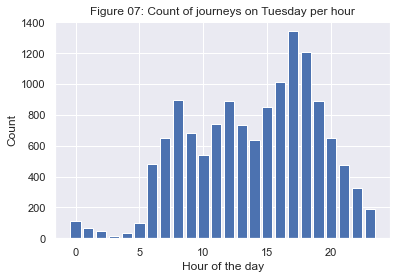

In [662]:
Tuesday_hour = bike_dataset[bike_dataset['weekday'] == 'Tuesday']['hour'].value_counts()

plt.bar(Tuesday_hour.index, Tuesday_hour)
plt.title('Figure 07: Count of journeys on Tuesday per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.show()

The above graph also shows that on the peak day of week, 17:00 remains the peak hour. We can similarly explore the least days of the week with frequent journies which is Saturday and Sunday:

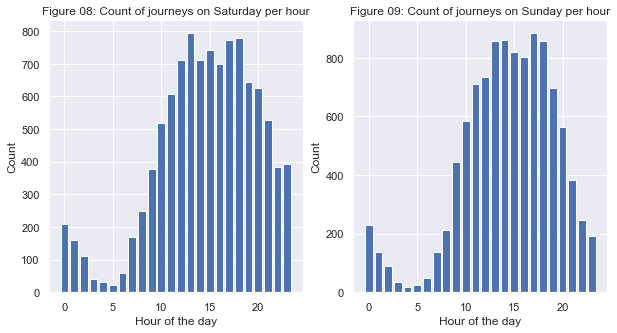

In [663]:
# Extract the counts of journeys on Saturday and Sunday for each hour of the day
saturday_counts = bike_dataset.loc[bike_dataset['weekday'] == 'Saturday']['hour'].value_counts()
sunday_counts = bike_dataset.loc[bike_dataset['weekday'] == 'Sunday']['hour'].value_counts()

# Create two plots in the same figure
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(saturday_counts.index, saturday_counts)
plt.title('Figure 08: Count of journeys on Saturday per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.bar(sunday_counts.index, sunday_counts)
plt.title('Figure 09: Count of journeys on Sunday per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.show()

We can recognize that the peak hour at 17:00 does not differ on Sunday, whereas on Saturday the peak hour is at approximately 13:00. We may also preform analysis on the starting stations to understand which stations with high demand and those with less demand and or bike availability.

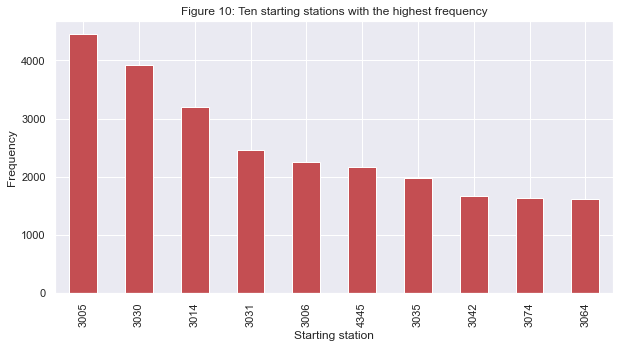

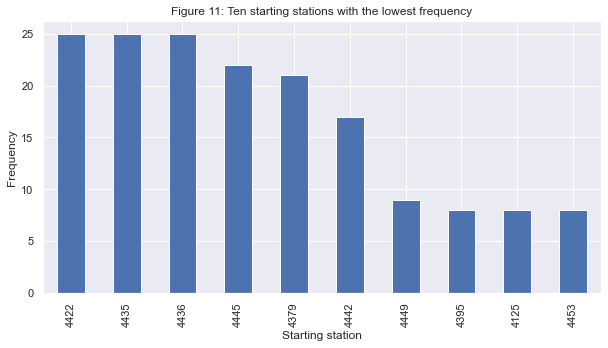

In [666]:
# Group the rows by 'start_station' and count the number of rows in each group
sst = bike_dataset.groupby('start_station').size()

# Sort the counts in descending order
sst = sst.sort_values(ascending=False)

# Plot the 10 starting stations with the highest frequency
high_sst = sst.head(10)
high_sst.plot(kind='bar', figsize=(10, 5), color='r')
plt.title('Figure 10: Ten starting stations with the highest frequency')
plt.xlabel('Starting station')
plt.ylabel('Frequency')
plt.show()

# Plot the 10 starting stations with the lowest frequency
low_sst = sst.tail(10)
low_sst.plot(kind='bar', figsize=(10, 5), color='b')
plt.title('Figure 11: Ten starting stations with the lowest frequency')
plt.xlabel('Starting station')
plt.ylabel('Frequency')
plt.show()

Reading the above plot, we can gain insights into the usage patterns of the bike-sharing system in the area. the barchart suggest that starting stations in Figure 10 have a high frequency, it could be because the stations are located in a highly populated or tourist area, or because the station is well-connected to other modes of transportation. On the other hand, if a certain starting station has a low frequency as show in Figure 11, it could be because the station is located in a less populated or less touristy area, or because the station is less accessible or less popular.

We can use this information to identify opportunities for improving the bike-sharing system. One way to do this is for example if a certain starting station has a high frequency but a low availability of bikes, it could be because the demand for bikes at that station is higher than the supply. In this case, the bike-sharing company could consider increasing the number of bikes at the station to meet the demand. On the other hand, if a certain starting station has a low frequency and a high availability of bikes, it could be because the demand for bikes at that station is low compared to the supply. Consequently, the bike-sharing company could consider redistributing the excess bikes to other stations with higher demand.

We can demonstrate the locations as per the provided coordinates of longitude and latitude as follows:

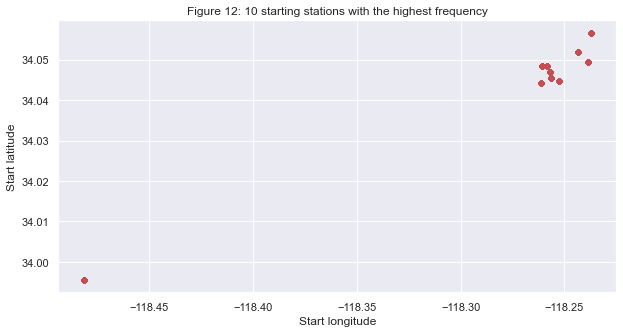

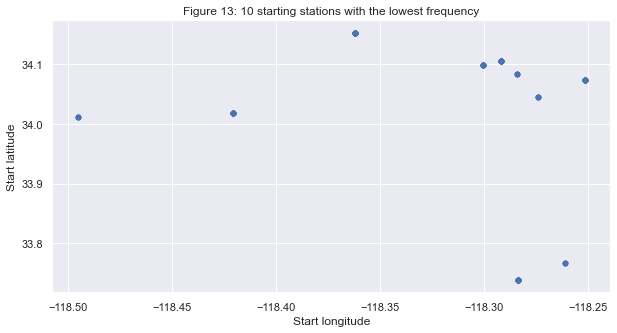

In [672]:
# Group the rows by 'start_station' and count the number of rows in each group
sstt = bike_dataset.groupby('start_station').size()

# Sort the counts in descending order
sstt = sstt.sort_values(ascending=False)

# Select the top and bottom 10 rows
high_sstt = sstt.head(10)
low_sstt = sstt.tail(10)

# Filter the original dataframe to include only the top and bottom 10 rows
high_bike_dataset = bike_dataset[bike_dataset['start_station'].isin(high_sstt.index)]
low_bike_dataset = bike_dataset[bike_dataset['start_station'].isin(low_sstt.index)]

# Plot the start longitude and latitude for the 10 starting stations with the highest frequency
high_bike_dataset.plot(kind='scatter', x='start_lon', y='start_lat', figsize=(10, 5), color='r')
plt.title('Figure 12: 10 starting stations with the highest frequency')
plt.xlabel('Start longitude')
plt.ylabel('Start latitude')
plt.show()

# Plot the start longitude and latitude for the 10 starting stations with the lowest frequency
low_bike_dataset.plot(kind='scatter', x='start_lon', y='start_lat', figsize=(10, 5), color='b')
plt.title('Figure 13: 10 starting stations with the lowest frequency')
plt.xlabel('Start longitude')
plt.ylabel('Start latitude')
plt.show()

As of the above information we can indentify the location of those high frequency stations and low frequency stations in order to understand the root-cause (e.g., are located in high-traffic areas or popular destinations) or overall the reason why they are heavily utilized by riders and those underutilized to help can identify any potential geographical trends in bike usage.

By grouping the data by hour and calculating the mean duration, we can see how the average duration varies by hour of the day. This information can be useful in understanding the patterns of bike usage and identifying any potential trends or correlations between duration and the hour of the day as follows:

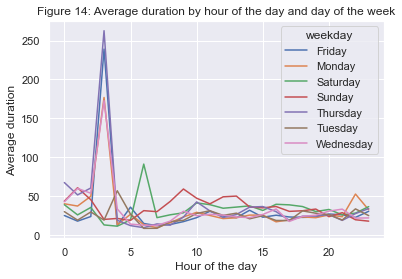

In [679]:
# Group the data by the hour of the day and the day of the week
grouped_data = bike_dataset.groupby(['hour', 'weekday'])['duration'].mean().reset_index()

# Plot the average duration by hour of the day and day of the week using a line plot
sns.lineplot(x='hour', y='duration', hue='weekday', data=grouped_data)

# Add x and y labels
plt.xlabel('Hour of the day')
plt.ylabel('Average duration')

# Add a title
plt.title('Figure 14: Average duration by hour of the day and day of the week')

# Show the plot
plt.show()

As per Figure 14, we can identify a recognizable trend that the average duration changes at approximately 15:00 for most weekdays except for the weekend (Saturday and Sunday) as well as Tuesday. This could be due to various factors such as increased demand for bike rentals during certain hours of the day, different patterns of usage on weekdays versus weekends, or other external factors such as weather or events happening in the area.

In the next analysis we will be preform a statistical test in order to understand how the duration mean varies between passholder plans, namely, Monthly Passes, Annula Passes and Walk-ups. To do so, we will be using the scipy.stats library in order to conduct a t-test and output the p-values which observes the mean duration and how it varies between categories that we select as follows:  

In [681]:
#Extract the duration data for each 'passholder_type' category and store it in separate variables
duration_monthly = bike_dataset[bike_dataset['passholder_type'] == 'Monthly Pass']['duration']
duration_annual = bike_dataset[bike_dataset['passholder_type'] == 'Annual Pass']['duration']
duration_walkup = bike_dataset[bike_dataset['passholder_type'] == 'Walk-up']['duration']

In [682]:
from scipy.stats import ttest_ind

# Compare monthly pass to annual pass
t_test_result1 = ttest_ind(duration_monthly, duration_annual)
print(t_test_result1)

# Compare monthly pass to walk-up
t_test_result2 = ttest_ind(duration_monthly, duration_walkup)
print(t_test_result2)

# Compare annual pass to walk-up
t_test_result3 = ttest_ind(duration_annual, duration_walkup)
print(t_test_result3)

Ttest_indResult(statistic=2.948081338439796, pvalue=0.0031987234897233076)
Ttest_indResult(statistic=-52.90667058598275, pvalue=0.0)
Ttest_indResult(statistic=-19.82147073930539, pvalue=7.970594234589781e-87)


Intrepreting the output, we recognize that the pvalue between monthly pass to annual pass as well as the monthly pass to walk-up is less than 0.05 which signifies a significant difference in the mean duration between those categories. This means that there is a real difference in the mean duration between the two sets of categories (monthly pass to annual pass and monthly pass to walk-up). This could imply that Annual Pass holders have a significantly longer average duration compared to Monthly Pass holders. This also the case for Monthly Pass to Walk-up since the p-value is 0.0.